**Remarks**

In this notebook, we will learn about Apriori Algoritm to perform a Market Basket Analysis.

In [1]:
!pip install squarify

In [2]:
# Prepare useful library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
plt.style.use('bmh')

from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Call the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d devchauhan1/market-basket-optimisationcsv

  0% 0.00/46.9k [00:00<?, ?B/s]
100% 46.9k/46.9k [00:00<00:00, 37.7MB/s]


In [5]:
!unzip "market-basket-optimisationcsv.zip"

Archive:  market-basket-optimisationcsv.zip
  inflating: Market_Basket_Optimisation.csv  


In [6]:
# See the dataset
data = pd.read_csv("Market_Basket_Optimisation.csv")
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Shape of dataframe", data.shape)

Shape of dataframe (7500, 20)


In [ ]:
print("Information dataset\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

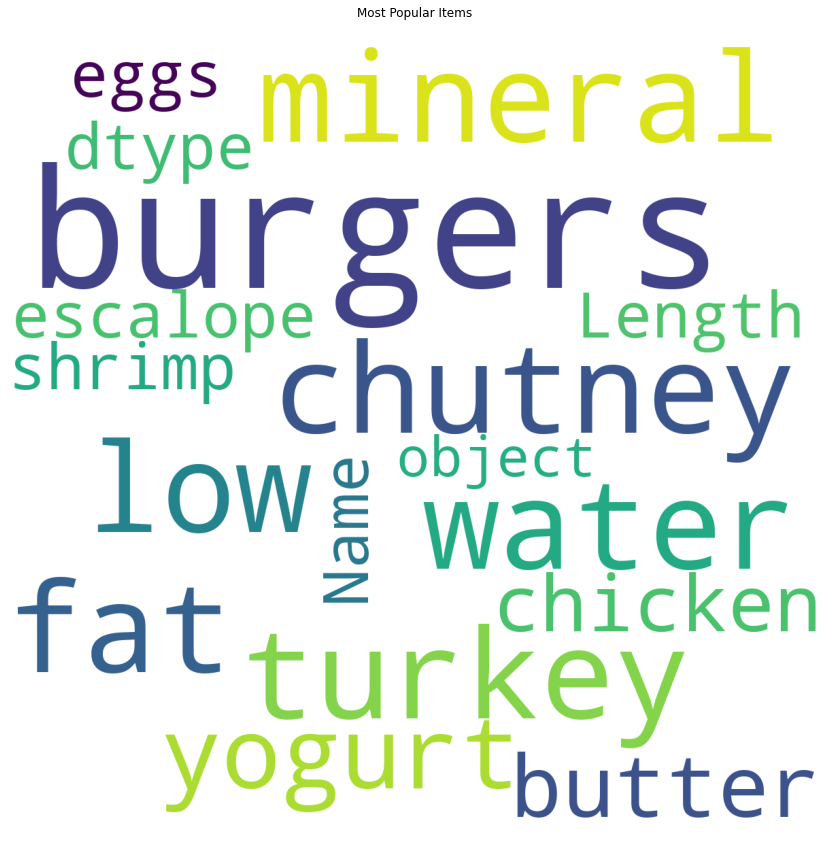

In [ ]:
# Popular word
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15,15)

wordcloud = WordCloud(background_color = 'white',
                      width=1200, height=1200, 
                      max_words=121).generate(str(data.iloc[:,0]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Popular Items", fontsize=12)
plt.show();

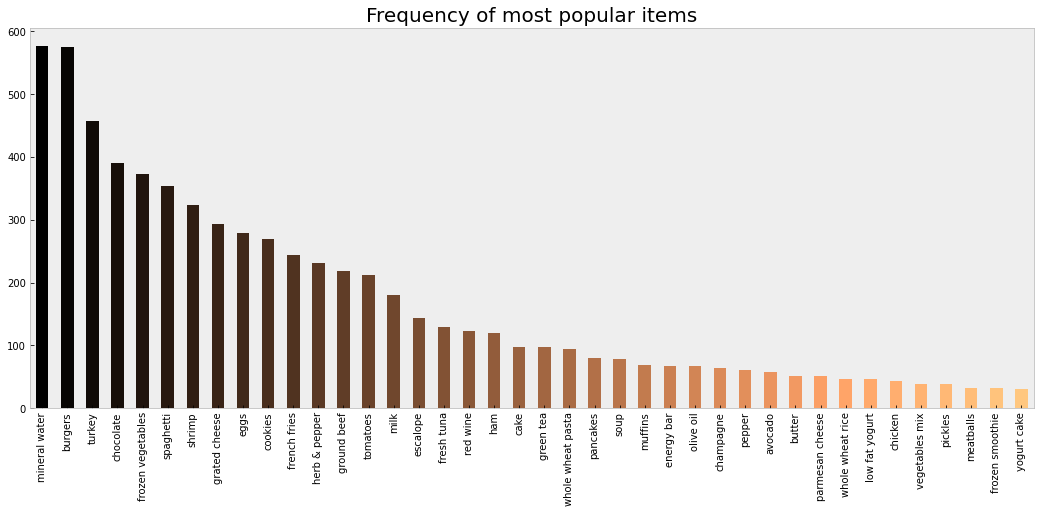

In [ ]:
# frequency of popular items
plt.rcParams['figure.figsize'] = (18,7)
color = plt.cm.copper(np.linspace(0,1,40))
data.iloc[:,0].value_counts().head(40).plot.bar(color=color)
plt.title("Frequency of most popular items", fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show();

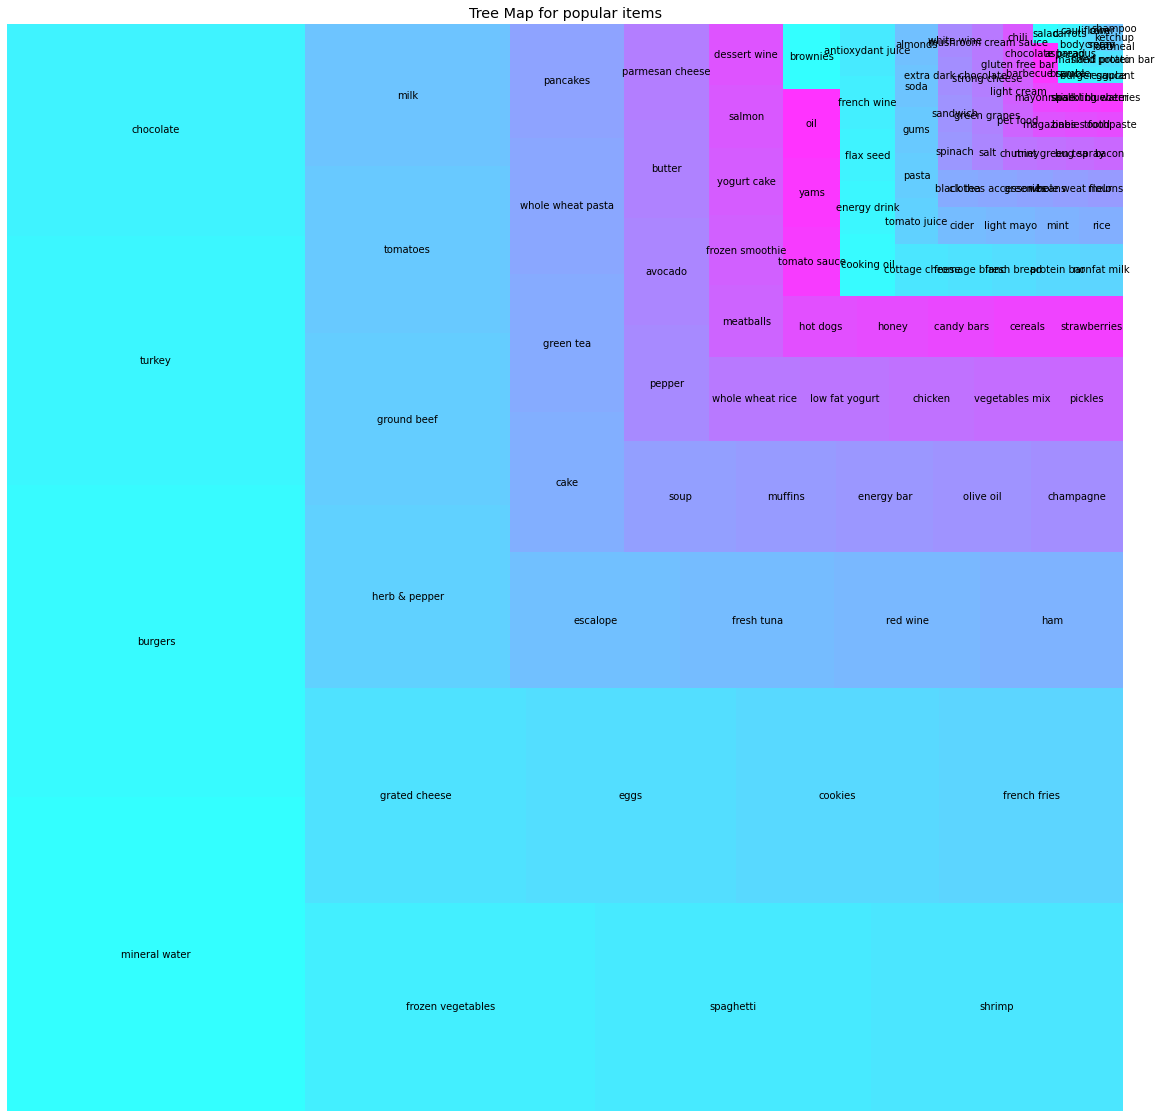

In [ ]:
# plotting a tree map
y = data.iloc[:,0].value_counts().to_frame()
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values, label=y.index, alpha=0.8, color=color)
plt.title("Tree Map for popular items")
plt.axis("off")
plt.show();

In [11]:
data['food'] = 'Food'
food = data.truncate(before=-1, after=15)

In [16]:
import networkx as nx
food = nx.from_pandas_edgelist(food, source = 'food', target = 'shrimp', edge_attr = True)

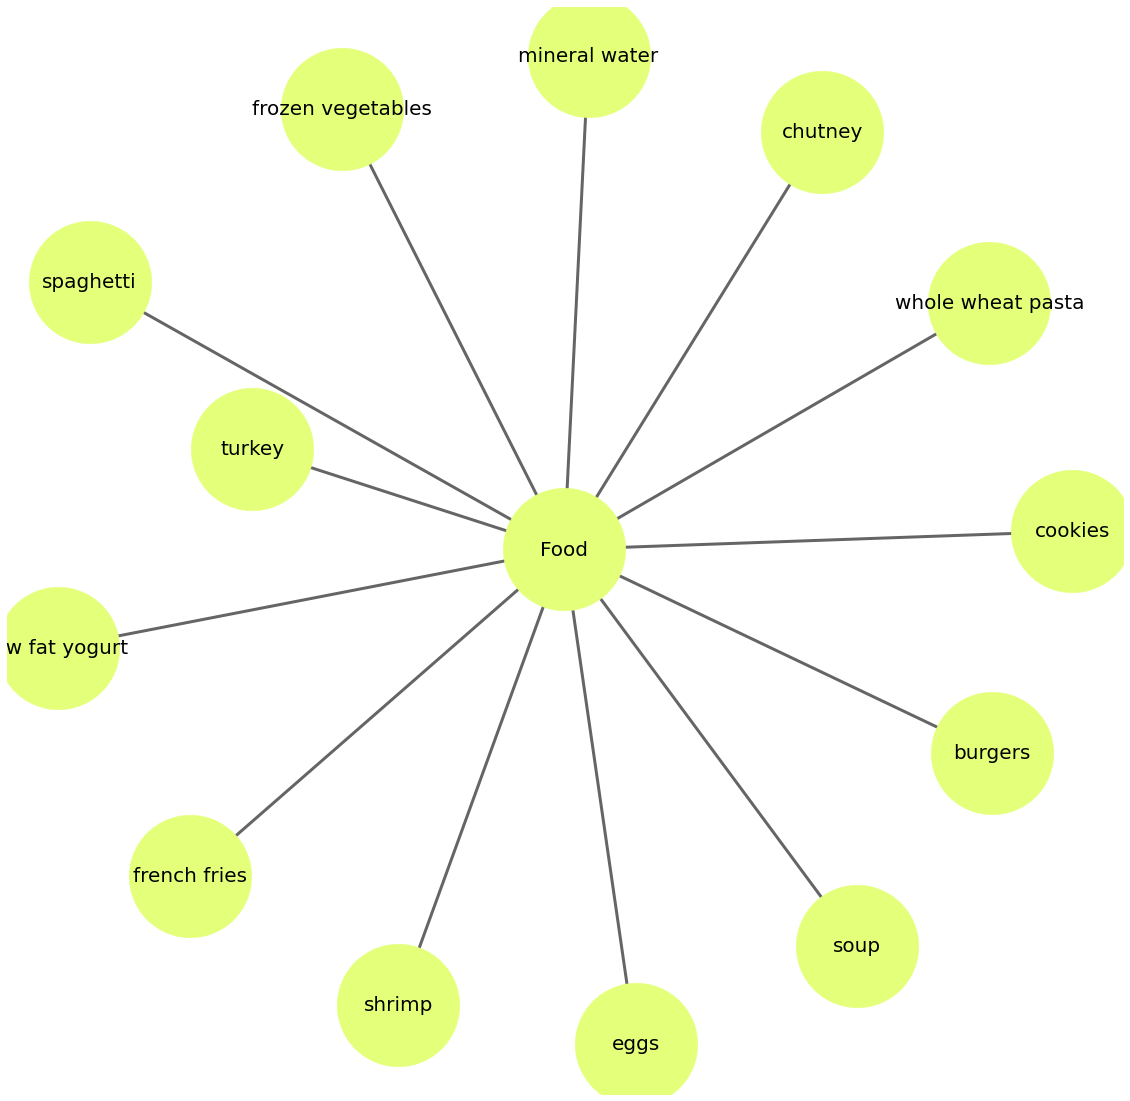

In [17]:
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size=15000, node_color=color)
nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color='black')
nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')
plt.axis('off')
plt.grid()
plt.show('Top 15 First Choices')
plt.show();

In [27]:
# Data Preprocessing
trans = []
for i in range(0, 7500):
  trans.append([str(data.values[i, j]) for j in range (0, 20)])

# convert into numpy array
trans = np.array(trans)

# checking shape of array
print(trans.shape)

(7500, 20)


In [28]:
trans

array([['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['turkey', 'avocado', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [29]:
# Transaction encoder
from mlxtend.preprocessing import TransactionEncoder

# convert transaction encoder
te = TransactionEncoder()
df = te.fit_transform(trans)
df = pd.DataFrame(df, columns=te.columns_)

# checking shape of array
df.shape

(7500, 121)

In [30]:
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
# Choose 30 item nominate 
df = df.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                'avocado', 'pepper']]
df.shape              

(7500, 30)

In [32]:
df.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,french fries,herb & pepper,ground beef,tomatoes,milk,escalope,fresh tuna,red wine,ham,cake,green tea,whole wheat pasta,pancakes,soup,muffins,energy bar,olive oil,champagne,avocado,pepper
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
# Applying Apriori
# Frequency table in all transaction
from mlxtend.frequent_patterns import apriori

# at least 1% support
apriori(df, min_support=0.01, use_colnames=True)

,support,itemsets
0,0.238267,(mineral water)
1,0.087200,(burgers)
2,0.062533,(turkey)
3,0.163867,(chocolate)
4,0.095333,(frozen vegetables)
...,...,...
169,0.010133,"(eggs, ground beef, mineral water)"
170,0.013067,"(milk, eggs, mineral water)"
171,0.011067,"(milk, ground beef, mineral water)"
172,0.010533,"(spaghetti, chocolate, eggs)"


In [34]:
# Selecting and filtering result
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238267,(mineral water),1
1,0.087200,(burgers),1
2,0.062533,(turkey),1
3,0.163867,(chocolate),1
4,0.095333,(frozen vegetables),1
5,0.174133,(spaghetti),1
6,0.071333,(shrimp),1
7,0.052400,(grated cheese),1
8,0.179733,(eggs),1
9,0.080400,(cookies),1


In [35]:
# Choose length = 2 and support more than 10%
frequent_itemsets[(frequent_itemsets['length'] == 2) & 
                  (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
20,0.052667,"(chocolate, mineral water)",2
21,0.059733,"(spaghetti, mineral water)",2
22,0.050933,"(eggs, mineral water)",2


In [36]:
# 3 Choose length = 1 and support more than 10%
frequent_itemsets[(frequent_itemsets['length'] == 1) & 
                  (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
0,0.238267,(mineral water),1
1,0.087200,(burgers),1
2,0.062533,(turkey),1
3,0.163867,(chocolate),1
4,0.095333,(frozen vegetables),1
5,0.174133,(spaghetti),1
6,0.071333,(shrimp),1
7,0.052400,(grated cheese),1
8,0.179733,(eggs),1
9,0.080400,(cookies),1


In [37]:
# association mining
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs', 'mineral water'}]

,support,itemsets,length
22,0.050933,"(eggs, mineral water)",2


In [40]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'mineral water'}]

,support,itemsets,length
0,0.238267,(mineral water),1


In [39]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'soup'}]

,support,itemsets,length
18,0.050533,(soup),1
